In [1]:
import numpy as np
import pandas as pd
# https://us.soccerway.com/teams/england/england/774/squad/

In [3]:
country = input("Enter country:")
print("Country is: " + country)

Enter country:USA
Country is: USA


In [59]:
first = pd.read_csv(filenames[0])
sec = pd.read_csv(filenames[1])

In [64]:
first.columns

Index(['Player', 'Pos', 'GP', 'GS', 'MIN', 'G', 'A', 'Y/R', 'MOTM',
       'Career Caps', 'Career Goals', 'Career Assists'],
      dtype='object')

In [65]:
sec.columns

Index(['Player', 'Pos', 'GP', 'GS', 'MIN', 'G', 'A', 'Y/R', 'MOTM',
       'Career Caps', 'Career Goals', 'Career Assists'],
      dtype='object')

In [67]:
both = first.groupby('Player').sum().add(sec.groupby('Player').sum(), fill_value=0).reset_index()
both.head(5)

,Player,GP,GS,MIN,G,A,MOTM,Career Caps,Career Goals,Career Assists
0,"Acosta, Kellyn",6.0,4.0,392.0,1.0,1.0,0.0,23.0,2.0,1.0
1,"Adams, Tyler",9.0,8.0,748.0,1.0,0.0,0.0,19.0,2.0,0.0
2,"Agudelo, Juan",1.0,0.0,21.0,0.0,0.0,0.0,28.0,3.0,3.0
3,"Altidore, Jozy",5.0,3.0,264.0,1.0,1.0,1.0,115.0,42.0,14.0
4,"Amon, Jonathan",2.0,1.0,86.0,0.0,0.0,0.0,3.0,0.0,0.0


In [63]:
both = first.merge(sec, on="Player").sum(axis=1)
both.head(5)

0     787
1      92
2    1309
3    1211
4     542
dtype: int64

In [60]:
first.head(10)

,Player,Pos,GP,GS,MIN,G,A,Y/R,MOTM,Career Caps,Career Goals,Career Assists
0,"Acosta, Kellyn",M,6,4,392,1,1,1/0,0,23,2,1
1,"Adams, Tyler",M,8,7,658,1,0,1/0,0,9,1,0
2,"Agudelo, Juan",F,1,0,21,0,0,0/0,0,28,3,3
3,"Amon, Jonathan",M,1,1,55,0,0,0/0,0,1,0,0
4,"Arriola, Paul",M,2,1,100,0,0,0/0,0,17,2,2
5,"Bono, Alex",GK,1,1,90,0,0,0/0,0,1,0,0
6,"Bradley, Michael",M,2,1,101,0,0,0/0,0,142,17,22
7,"Brooks, John",D,3,3,270,0,0,0/0,1,36,3,0
8,"Cannon, Reggie",D,2,2,161,0,0,1/0,0,2,0,0
9,"Carter-Vickers, Cameron",D,6,6,511,0,0,2/0,0,7,0,0


In [61]:
sec.head(10)

,Player,Pos,GP,GS,MIN,G,A,Y/R,MOTM,Career Caps,Career Goals,Career Assists
0,"Adams, Tyler",M,1,1,90,0,0,0/0,0,10,1,0
1,"Altidore, Jozy",F,5,3,264,1,1,1/0,1,115,42,14
2,"Amon, Jonathan",M,1,0,31,0,0,0/0,0,2,0,0
3,"Arriola, Paul",M,15,12,1112,3,2,1/0,0,32,5,4
4,"Baird, Corey",M,4,3,226,0,1,0/0,0,4,0,1
5,"Boyd, Tyler",F,10,6,510,2,1,0/0,1,10,2,1
6,"Bradley, Michael",M,9,8,717,0,1,0/0,0,151,17,23
7,"Brooks, John",D,2,2,180,0,0,0/0,1,38,3,0
8,"Cannon, Reggie",D,8,6,561,0,1,0/0,0,10,0,1
9,"Carter-Vickers, Cameron",D,1,0,86,0,0,0/0,0,8,0,0


In [114]:
import glob
filenames = glob.glob(country + "\*.csv")
print('File names:', filenames)
global data
firstRead = False
# for loop to iterate all csv files
colsToKeep = ['Player', 'Pos', 'GP', 'GS', 'MIN', 'G', 'A', 'MOTM']
for file in filenames:
    if firstRead:
        newData = pd.read_csv(file)
        newData = newData[colsToKeep]
        data = data.groupby('Player').sum().add(newData.groupby('Player').sum(), fill_value=0).reset_index()
    else:
        data = pd.read_csv(file)
        data = data[colsToKeep]
        firstRead = !firstRead
data = data[data.Player != 'TOTALS']

File names: ['USA\\usmnt_2018.csv', 'USA\\usmnt_2019.csv', 'USA\\usmnt_2020.csv', 'USA\\usmnt_2021.csv', 'USA\\usmnt_2022.csv']


In [115]:
data.head(5)

,Player,GP,GS,MIN,G,A,MOTM
0,"Aaronson, Brenden",18.0,11.0,1015.0,5.0,4.0,2.0
1,"Acosta, Kellyn",34.0,20.0,2128.0,1.0,4.0,0.0
2,"Adams, Tyler",26.0,23.0,2032.0,1.0,0.0,2.0
3,"Agudelo, Juan",1.0,0.0,21.0,0.0,0.0,0.0
4,"Akinola, Ayo",1.0,1.0,74.0,1.0,0.0,0.0


In [116]:
data["goals_per_90"] = data["G"]/(data["MIN"]/90)
data["assists_per_90"] = data["A"]/(data["MIN"]/90)

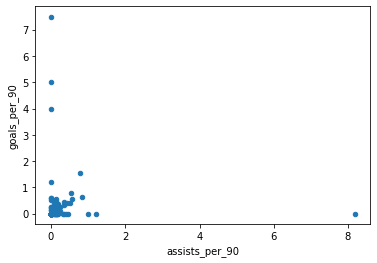

In [117]:
import matplotlib.pyplot as plt
data.plot(kind="scatter", x="assists_per_90", y="goals_per_90")

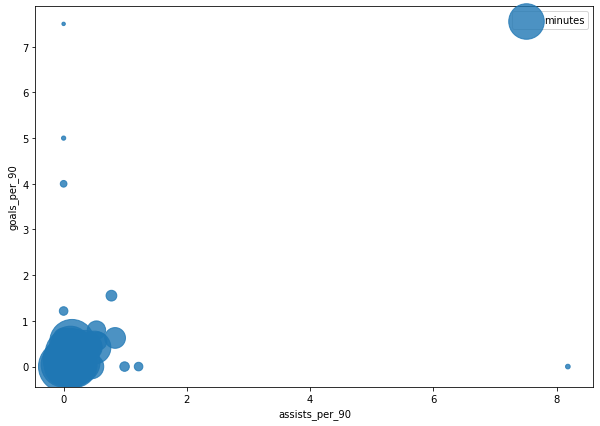

In [118]:
data.plot(kind="scatter", x="assists_per_90", y="goals_per_90",  
          s=data["MIN"], label="minutes", figsize=(10,7), alpha=0.8)

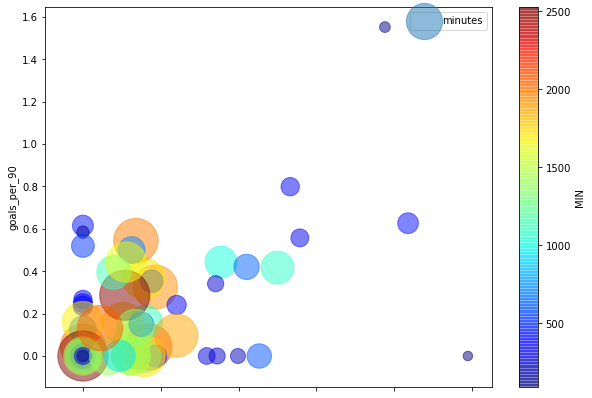

In [119]:
dataOver90 = data[data.MIN >= 90]
dataOver90.plot(kind="scatter", x="assists_per_90", y="goals_per_90",  
          s=dataOver90["MIN"], label="minutes", c="MIN", cmap="jet", colorbar=True,figsize=(10,7), alpha=0.5)

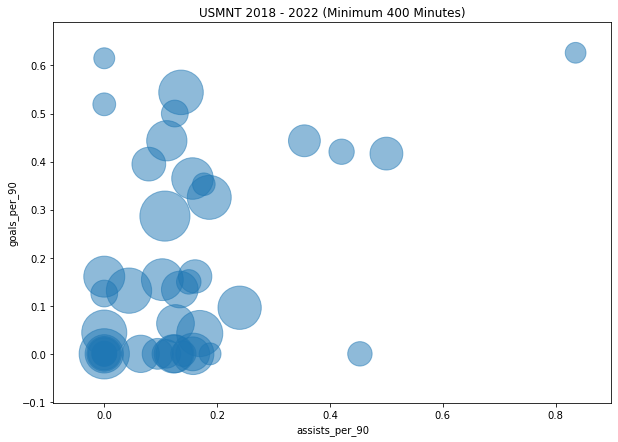

In [138]:
dataOver400 = data[data.MIN >= 400]
dataOver400.plot(title='USMNT 2018 - 2022 (Minimum 400 Minutes)', kind="scatter", x="assists_per_90", y="goals_per_90",  
          s=dataOver400["MIN"], figsize=(10,7), alpha=0.5)

In [139]:
np.where((dataOver400['assists_per_90'] > .5) & (dataOver400['goals_per_90'] > .5))

(array([13], dtype=int64),)

In [140]:
dataOver400.iloc[13]

Player            Ferreira, Jesús
GP                              9
GS                              5
MIN                           431
G                               3
A                               4
MOTM                            1
goals_per_90              0.62645
assists_per_90           0.835267
Name: 28, dtype: object

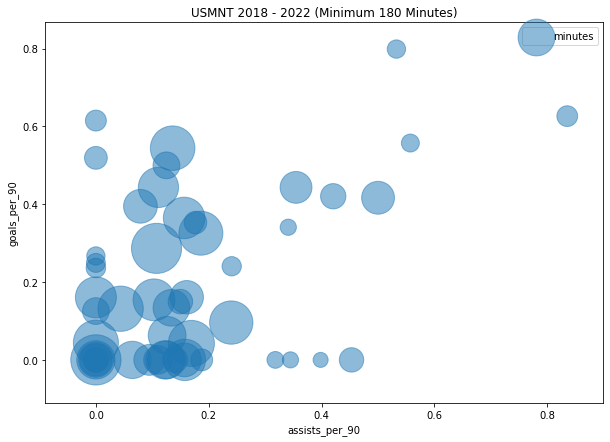

In [129]:
dataOver180 = data[data.MIN >= 180]
dataOver180.plot(title='USMNT 2018 - 2022 (Minimum 180 Minutes)', kind="scatter", x="assists_per_90", y="goals_per_90",  
          s=dataOver180["MIN"], label="minutes",figsize=(10,7), alpha=0.5)

In [135]:
np.where((dataOver180['assists_per_90'] > .5) & (dataOver180['goals_per_90'] > .5))

(array([16, 17, 25], dtype=int64),)

In [136]:
dataOver180.iloc[25]

Player            Lewis, Jonathan
GP                              8
GS                              3
MIN                           323
G                               2
A                               2
MOTM                            0
goals_per_90             0.557276
assists_per_90           0.557276
Name: 47, dtype: object

In [132]:
np.where((dataOver180['assists_per_90'] > .4) & (dataOver180['goals_per_90'] > .6))

(array([16, 17], dtype=int64),)

In [133]:
dataOver180.iloc[17]

Player            Gioacchini, Nicholas
GP                                   8
GS                                   1
MIN                                338
G                                    3
A                                    2
MOTM                                 1
goals_per_90                  0.798817
assists_per_90                0.532544
Name: 31, dtype: object

In [130]:
np.where((dataOver180['assists_per_90'] > .8) & (dataOver180['goals_per_90'] > .4))

(array([16], dtype=int64),)

In [131]:
dataOver180.iloc[16]

Player            Ferreira, Jesús
GP                              9
GS                              5
MIN                           431
G                               3
A                               4
MOTM                            1
goals_per_90              0.62645
assists_per_90           0.835267
Name: 28, dtype: object

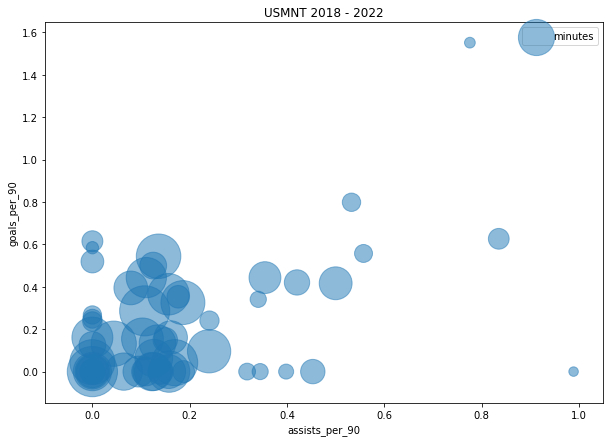

In [125]:
dataOver90.plot(title='USMNT 2018 - 2022', kind="scatter", x="assists_per_90", y="goals_per_90",  
          s=dataOver90["MIN"], label="minutes",figsize=(10,7), alpha=0.5)

In [126]:
np.where((dataOver90['assists_per_90'] > .8) & (dataOver90['goals_per_90'] < .4))

(array([15], dtype=int64),)

In [127]:
dataOver90.iloc[15]

Player            Corona, Joe
GP                          3
GS                          1
MIN                        91
G                           0
A                           1
MOTM                        0
goals_per_90                0
assists_per_90       0.989011
Name: 20, dtype: object

In [122]:
np.where((dataOver90['assists_per_90'] > .8) & (dataOver90['goals_per_90'] > .4))

(array([19], dtype=int64),)

In [123]:
dataOver90.iloc[19]

Player            Ferreira, Jesús
GP                              9
GS                              5
MIN                           431
G                               3
A                               4
MOTM                            1
goals_per_90              0.62645
assists_per_90           0.835267
Name: 28, dtype: object

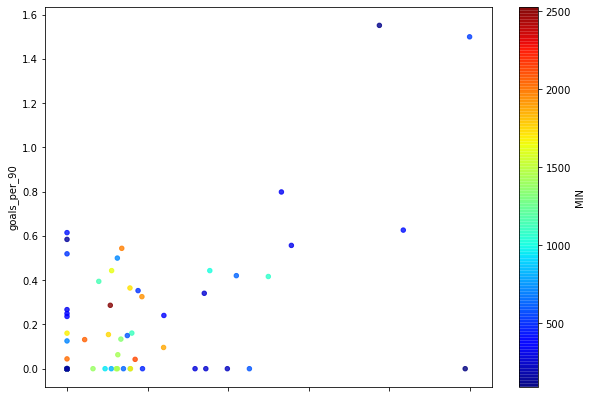

In [83]:
dataOver90.plot(kind="scatter", x="assists_per_90", y="goals_per_90",  
          c="MIN", cmap="jet", colorbar=True,figsize=(10,7), alpha=0.8)

In [45]:
temp["goals_per_90"] = temp["G"]/(temp["MIN"]/90)
temp["assists_per_90"] = temp["A"]/(temp["MIN"]/90)

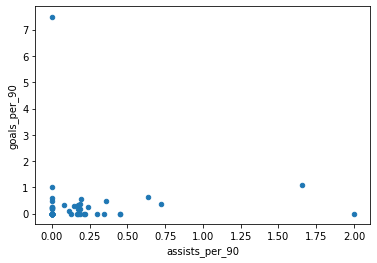

In [47]:
import matplotlib.pyplot as plt
temp.plot(kind="scatter", x="assists_per_90", y="goals_per_90")

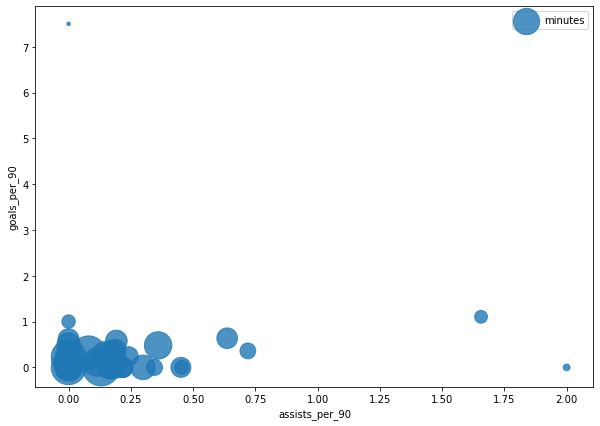

In [51]:
temp.plot(kind="scatter", x="assists_per_90", y="goals_per_90",  
          s=temp["MIN"], label="minutes", figsize=(10,7), alpha=0.8)

In [52]:
np.where(temp['assists_per_90'] > 1.5)

(array([12, 15], dtype=int64),)

In [54]:
temp.iloc[15]

Player            Ferreira, Jesús
Pos                             F
GP                              4
GS                              2
MIN                           163
G                               2
A                               3
G+A                             5
YC                              1
RC                              0
MOTM                            1
Career Caps                     8
Career Goals                    3
Career Assists                  4
Career G+A                      7
goals_per_90              1.10429
assists_per_90            1.65644
Name: 15, dtype: object

In [ ]:
# circle radius corresponds to population size
# colors for median housing price
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap="jet", colorbar=True,
             sharex=False)

In [88]:
dataOver90.head(2)

,Player,GP,GS,MIN,G,A,MOTM,goals_per_90,assists_per_90
0,"Aaronson, Brenden",18.0,11.0,1015.0,5.0,4.0,2.0,0.443350,0.354680
1,"Acosta, Kellyn",34.0,20.0,2128.0,1.0,4.0,0.0,0.042293,0.169173


In [90]:
from IPython.core.display import display,HTML
temp = dataOver90.copy()
temp['Picture'] = ''
temp.head(1)

,Player,GP,GS,MIN,G,A,MOTM,goals_per_90,assists_per_90,Picture
0,"Aaronson, Brenden",18.0,11.0,1015.0,5.0,4.0,2.0,0.44335,0.35468,


In [97]:
temp.iloc[0]["Picture"] = 'PlayerPictures\\Aaronson.jpg'

C:\Users\Kyle\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
filenames

['USA\\usmnt_2018.csv',
 'USA\\usmnt_2019.csv',
 'USA\\usmnt_2020.csv',
 'USA\\usmnt_2021.csv',
 'USA\\usmnt_2022.csv']

In [99]:
temp.at[0, 'Picture'] = 'PlayerPictures\\Aaronson.jpg'

In [100]:
temp.head(1)

,Player,GP,GS,MIN,G,A,MOTM,goals_per_90,assists_per_90,Picture
0,"Aaronson, Brenden",18.0,11.0,1015.0,5.0,4.0,2.0,0.44335,0.35468,PlayerPictures\Aaronson.jpg


In [102]:
display(HTML(temp.to_html(escape=False)))

,Player,GP,GS,MIN,G,A,MOTM,goals_per_90,assists_per_90,Picture
0,"Aaronson, Brenden",18.0,11.0,1015.0,5.0,4.0,2.0,0.443350,0.354680,PlayerPictures\Aaronson.jpg
1,"Acosta, Kellyn",34.0,20.0,2128.0,1.0,4.0,0.0,0.042293,0.169173,
2,"Adams, Tyler",26.0,23.0,2032.0,1.0,0.0,2.0,0.044291,0.000000,
5,"Altidore, Jozy",5.0,3.0,264.0,1.0,1.0,1.0,0.340909,0.340909,
8,"Arriola, Paul",29.0,23.0,1935.0,7.0,4.0,0.0,0.325581,0.186047,
9,"Baird, Corey",4.0,3.0,226.0,0.0,1.0,0.0,0.000000,0.398230,
11,"Bello, George",6.0,5.0,400.0,0.0,0.0,0.0,0.000000,0.000000,
12,"Bono, Alex",1.0,1.0,90.0,0.0,0.0,0.0,0.000000,0.000000,
13,"Boyd, Tyler",10.0,6.0,510.0,2.0,1.0,1.0,0.352941,0.176471,
14,"Bradley, Michael",11.0,9.0,818.0,0.0,1.0,0.0,0.000000,0.110024,


In [103]:
from PIL import Image

image = Image.open('PlayerPictures\\Aaronson.jpg')
image.show()